In [406]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd

------------------------------------------------------------------
Problem 1: Choose appropriate parameters for t to visualise the function P(t)

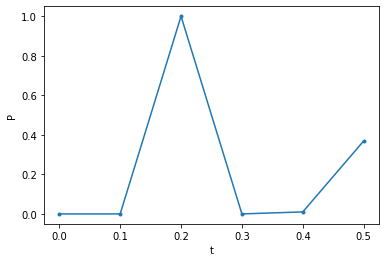

In [407]:
t = np.arange(0,0.6,0.1)
P = np.exp(-( (t-0.2)/0.02 )**2) + 2*np.exp(-( (t-0.63)/0.1 )**2)
plt.plot(t, P, '.-')
plt.xlabel('t');plt.ylabel('P')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------
Problem 2: Modify the 'categorise' function so that in addition to printing whether a number is 'low' or 'high', it also prints 'divisible by 10' *on the same line* if this condition is met (i.e. value % 10 == 0)

Don't worry about being concise...

In [408]:
def categorise(signal):
    for value in signal:
        if value < 100:
            print(value, 'low')
        else:
            print(value, 'high')

signal = [1, 42, 70, 100, 139, 150]

categorise(signal)

1 low
42 low
70 low
100 high
139 high
150 high


-------------------------------------------------------------------------------------------------------------------------------
Problem 3: Image generation. 

Below is a simple machine learning example, with a set of mock images of an electron beam on a screen and corresponding positions of the centre of the beam in x and y.

A model is trained with the centroids as inputs and the beam images as outputs, so that we can then predict beam images from the centroid positions.

Edit the example and/or make suggestions to improve performance.

In [409]:
# Generate dataset to work with
# An (N x 2) array describing offsets in x and y, and a corresponding array of images

def generate_data(num_examples, num_pix):
    np.random.seed(1)
    
    offsets = np.zeros((num_examples, 2))
    images = np.zeros((num_examples, num_pix, num_pix))
    
    x = np.linspace(-10, 10, num_pix)
    y = np.linspace(-10, 10, num_pix)
    x, y = np.meshgrid(x, y)
    
    for n in np.arange(num_examples):
        sigma = 3
        offset_x = 10.*(np.random.rand() - 0.5)
        offset_y = 10.*(np.random.rand() - 0.5)
        offsets[n, :] = [offset_x, offset_y]
        images[n, :, :] = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-offset_x)**2/(2*sigma**2) + (y-offset_y)**2/(2*sigma**2))))
        
    return offsets, images

num_examples = 10000
num_pixels = 20
offsets, images = generate_data(num_examples, num_pixels)

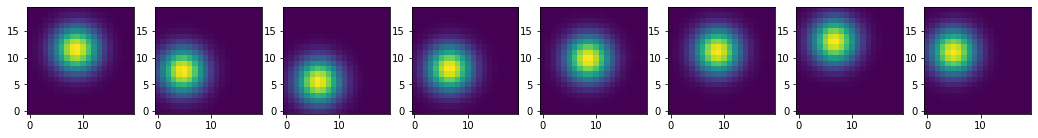

In [410]:
# Plot some training images

fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(18,16))
for colnum, col in enumerate(ax):
    col.imshow(images[colnum, :, :], origin='lower')

In [414]:
# set up and train a model to map offset to images

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
#from tensorflow import random
#random.set_seed(2)

model = Sequential()
model.add(Dense(2))
model.add(Dense(50))
model.add(Dense(num_pixels*num_pixels))

optimizer = RMSprop()
model.compile(optimizer = optimizer, loss='mse')

images_flattened = images.reshape(num_examples, num_pixels*num_pixels) # flatten 2D image array
history = model.fit(offsets, images_flattened, epochs=2)

Train on 10000 samples
Epoch 1/2
10000/10000 [==============================] - 1s 100us/sample - loss: 0.0022
Epoch 2/2
10000/10000 [==============================] - 0s 42us/sample - loss: 1.0017e-04


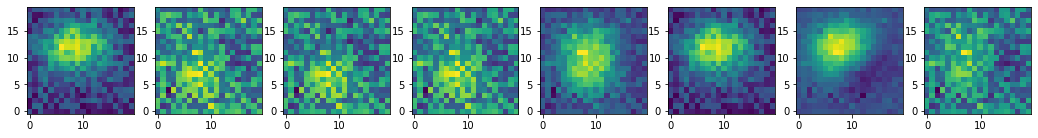

In [415]:
# Plot some image predictions (predicting on training data for simplicity!)

images_preds = model.predict(offsets).reshape(num_examples, num_pixels, num_pixels) # predict and reshape back to 2D

fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(18,16))
for colnum, col in enumerate(ax):
    col.imshow(images_preds[colnum, :, :], origin='lower')